In [107]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [108]:
path = "C:\\Users\\iftik\\Downloads\\PREDICTING-LAPTOP-PRICES.csv"
df=pd.read_csv(path)

In [109]:
df


,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0


In [110]:
df.head() #return top 5 rows


,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [111]:
df.shape #gives all attributes of dataset


(823, 19)

In [112]:
# checking the number of missing values in each column
df.isnull().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

In [113]:
#Check for missing values
df.isnull().values.any() 

np.False_

In [114]:
#dataset informationsdf.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [115]:
df.brand.value_counts()

brand
ASUS      249
DELL      151
Lenovo    144
HP        136
acer       51
MSI        50
APPLE      28
Avita      14
Name: count, dtype: int64

In [116]:
df.processor_name.value_counts()

processor_name
Core i5         290
Core i3         164
Core i7         110
Ryzen 5          82
Ryzen 7          56
Ryzen 9          26
Ryzen 3          26
Celeron Dual     24
M1               24
Pentium Quad     13
Core i9           8
Name: count, dtype: int64

In [117]:
df=df.drop("msoffice",axis=1)

In [118]:
df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,135990,3 stars,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,144990,3 stars,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,149990,3 stars,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,142990,3 stars,0,0


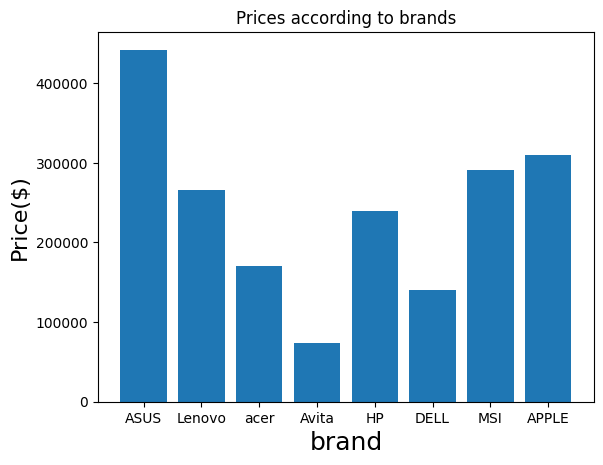

In [119]:

# All Brands
x = df['brand']
y = df['Price']

# Specified Brands
# specified = df.loc[df['Company'] == 'Samsung']
# x = specified['Model']
# y = specified['Price']

#Bar chart
plt.xlabel('brand', fontsize=18)
plt.ylabel('Price($)', fontsize=16)
plt.bar(x, y)

# Pie chart
# plt.pie(y, labels=x, radius=1.2,autopct='%0.01f%%', shadow=True, explode=[.05,.2,.05,.2,.05,.2,.05])

#  Line Graph
#plt.xlabel('Model', fontsize=18)
#plt.ylabel('Price($)', fontsize=16)
#plt.scatter(x, y)
#lt.plot(x, y)
plt.title('Prices according to brands')
plt.show()

In [120]:
new_df = df[['processor_brand', 'Price']]
new_df

,processor_brand,Price
0,Intel,34649
1,Intel,38999
2,Intel,39999
3,Intel,69990
4,Intel,26990
...,...,...
818,AMD,135990
819,AMD,144990
820,AMD,149990
821,AMD,142990


<Axes: xlabel='processor_brand', ylabel='Price'>

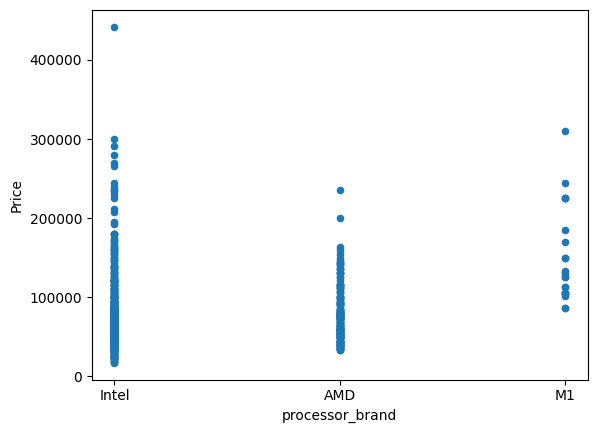

In [121]:
new_df.plot(x='processor_brand', y='Price', kind='scatter')	

<Axes: xlabel='rating', ylabel='Price'>

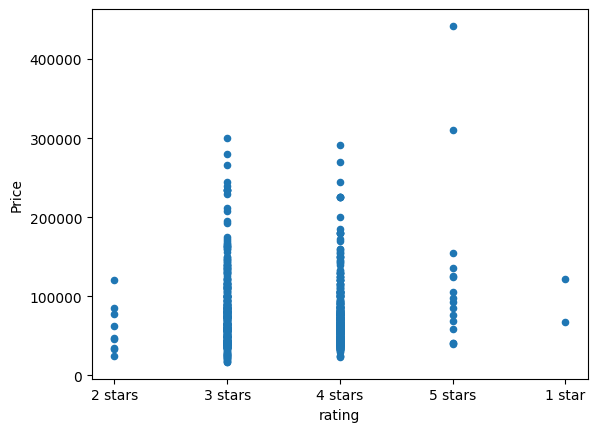

In [122]:
df.plot(x='rating', y='Price', kind='scatter')

<Figure size 700x500 with 0 Axes>

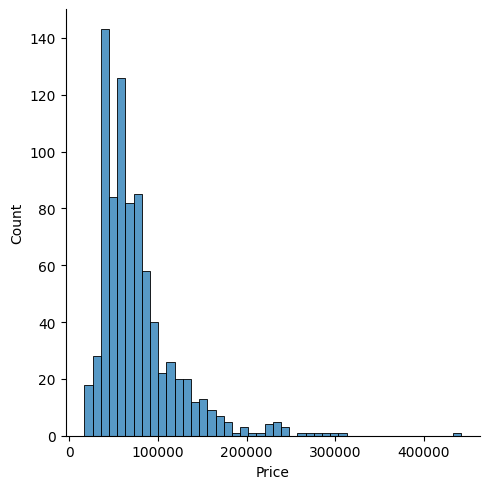

In [123]:
plt.figure(figsize=(7,5))
sns.displot(df["Price"])

In [124]:
features=df["os"].value_counts()

In [125]:
features

os
Windows    779
Mac         28
DOS         16
Name: count, dtype: int64

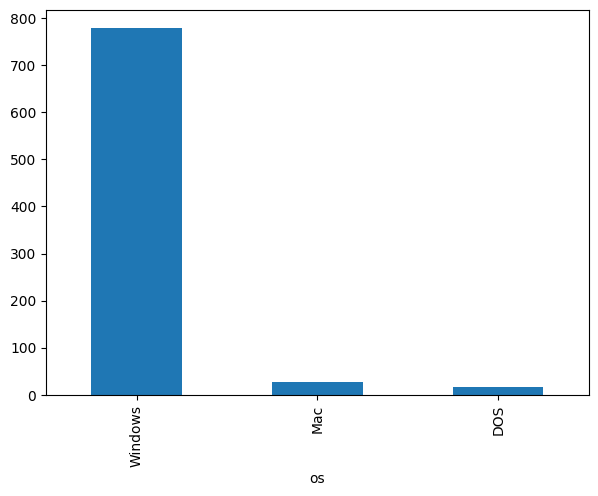

In [126]:
plt.figure(figsize=(7,5))
features.plot(kind="bar")
plt.show()

In [127]:
columns_to_encode= [col for col in df.columns if col !='Price']

In [128]:
columns_to_encode

['brand',
 'processor_brand',
 'processor_name',
 'processor_gnrtn',
 'ram_gb',
 'ram_type',
 'ssd',
 'hdd',
 'os',
 'os_bit',
 'graphic_card_gb',
 'weight',
 'warranty',
 'Touchscreen',
 'rating',
 'Number of Ratings',
 'Number of Reviews']

In [129]:
from sklearn.preprocessing import LabelEncoder

In [130]:
le=LabelEncoder()
for column in columns_to_encode:
    df[column]=le.fit_transform(df[column])

In [131]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,Price,rating,Number of Ratings,Number of Reviews
0,1,1,1,0,2,1,0,1,2,1,0,0,3,0,34649,1,3,0
1,5,1,1,0,2,1,0,1,2,1,0,0,3,0,38999,2,58,5
2,5,1,1,0,2,1,0,1,2,1,0,0,3,0,39999,2,8,1
3,1,1,2,0,3,1,6,0,2,0,1,0,3,0,69990,2,0,0
4,1,1,0,7,2,1,0,3,2,1,0,0,3,0,26990,2,0,0


In [132]:
y=df['Price']
X=df.drop('Price',axis=1)

In [133]:
X.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,rating,Number of Ratings,Number of Reviews
0,1,1,1,0,2,1,0,1,2,1,0,0,3,0,1,3,0
1,5,1,1,0,2,1,0,1,2,1,0,0,3,0,2,58,5
2,5,1,1,0,2,1,0,1,2,1,0,0,3,0,2,8,1
3,1,1,2,0,3,1,6,0,2,0,1,0,3,0,2,0,0
4,1,1,0,7,2,1,0,3,2,1,0,0,3,0,2,0,0


# TRAIN TEST SPLIT

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=42)

In [136]:
X_train.shape

(658, 17)

# MODEL TRAINING

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [138]:
le=LinearRegression()

In [139]:
le.fit(X_train,y_train)

LinearRegression()

In [140]:
le.score(X_train,y_train)

0.6206954171336792

In [141]:
le.score(X_test,y_test)

0.5371841897508576

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Step 2: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Initialize and train the logistic regression model
model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train_scaled, y_train)

# Step 4: Predict on the training data and evaluate accuracy
train_predictions = model.predict(X_train_scaled)
training_data_accuracy = accuracy_score(train_predictions, y_train)

print('Accuracy on Training data:', training_data_accuracy)


Accuracy on Training data: 0.27811550151975684


In [143]:
lr_pred=le.predict(X_test)
from sklearn.metrics import r2_score
lr_pred

array([130546.48474886,  41523.28172542,  40840.13911445,  49061.03730959,
        72167.10736069,  67403.50565597, 157017.1442542 ,  28610.64825901,
        42457.06700103,  65116.07230792, 116548.36935441,  79673.25227117,
        98951.43009629,  72899.16450905,  56011.80736227,  49975.359579  ,
        56714.53596064,  64005.04785996,  47392.02474578,  86108.69750518,
        86573.19578812,  79826.19010342,  91120.73957204,  59256.74802371,
        87253.21005782,  87147.14887541,  62741.26080566,  58509.18215237,
        47308.50467931,  51574.13381824,  67763.82043793,  57310.1356409 ,
        52959.62173685,  55612.40294632,  74801.27891195, 129276.70936064,
        71205.78656453,  65252.39240875,  97514.47376305,  42036.24354697,
        77516.39526804,  43782.33992024,  50688.30086677, 121962.17513412,
        54881.41435922,  51921.48293952,  59281.67422352,  48336.56247667,
        47455.40645118, 117277.98561885, 118111.33444388, 145820.71948953,
        72277.67084639, 1

In [144]:
lr_r2= r2_score(y_test,lr_pred)

In [145]:
lr_r2

0.5371841897508576

# RandomForest MODEL

In [146]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=25,max_features=30)


In [147]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=25, max_features=30)

In [148]:
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.9599378064678299
0.6264250405174541


In [149]:
rf_pred=le.predict(X_test)    
rf_pred

array([130546.48474886,  41523.28172542,  40840.13911445,  49061.03730959,
        72167.10736069,  67403.50565597, 157017.1442542 ,  28610.64825901,
        42457.06700103,  65116.07230792, 116548.36935441,  79673.25227117,
        98951.43009629,  72899.16450905,  56011.80736227,  49975.359579  ,
        56714.53596064,  64005.04785996,  47392.02474578,  86108.69750518,
        86573.19578812,  79826.19010342,  91120.73957204,  59256.74802371,
        87253.21005782,  87147.14887541,  62741.26080566,  58509.18215237,
        47308.50467931,  51574.13381824,  67763.82043793,  57310.1356409 ,
        52959.62173685,  55612.40294632,  74801.27891195, 129276.70936064,
        71205.78656453,  65252.39240875,  97514.47376305,  42036.24354697,
        77516.39526804,  43782.33992024,  50688.30086677, 121962.17513412,
        54881.41435922,  51921.48293952,  59281.67422352,  48336.56247667,
        47455.40645118, 117277.98561885, 118111.33444388, 145820.71948953,
        72277.67084639, 1

In [150]:
rf_r2= r2_score(y_test,rf_pred)
rf_r2

0.5371841897508576

# Gradient Boosting Regressor

In [151]:
from sklearn.ensemble import GradientBoostingRegressor
gb= GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=10,random_state=42)
gb.fit(X_train,y_train)


GradientBoostingRegressor(max_depth=10, random_state=42)

In [152]:
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.9599378064678299
0.6264250405174541


In [153]:
gb_pred=gb.predict(X_test)
gb_pred

array([104963.41585511,  39933.54249807,  39321.68470565,  44179.01225392,
        71564.00994567,  67805.58383649, 128395.86876545,  40939.26030935,
        55339.58753872,  56491.24524808, 156414.86252975,  62998.43809551,
        78883.19310947,  56939.18495381,  57210.41812229,  54121.84882335,
        42084.1724778 ,  62059.06963314,  50792.10524035,  83991.08784671,
        95295.33679008,  62322.62575001,  82319.18787484,  58063.70758077,
        72969.08162243,  60618.6171516 ,  56579.52193541,  58814.59267427,
        36732.55340835,  42281.94676312,  74038.45799325,  79215.08824766,
        64760.55844051,  43552.22257834,  58660.15018061, 157671.16044183,
        49917.63581865,  41566.7226603 ,  79992.39049775,  39447.23815745,
        59153.64233274,  43942.17254405,  61264.66358555, 133768.676892  ,
        58666.63799938,  37806.2603596 ,  60393.04018191,  55653.81025295,
        36961.70200015,  84288.65942029, 158286.8577865 , 128752.11805548,
        67690.78885868, 1

In [156]:
gb_r2= r2_score(y_test,rf_pred)
gb_r2

0.5371841897508576

In [158]:
out=pd.DataFrame({"y_test":y_test,"Prediction":gb_pred})
out

,y_test,Prediction
610,104990,104963.415855
174,41890,39933.542498
67,41998,39321.684706
168,40390,44179.012254
275,57500,71564.009946
...,...,...
290,77990,66362.788111
211,136590,85110.473877
448,55490,58167.060900
766,73138,91146.462807
